# **Importing necessary**

In [1]:
import numpy as np 
import pandas as pd 

import re
import string
import numpy as np

import matplotlib.pyplot as plt 
from nltk.probability import FreqDist
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer 

from tqdm.autonotebook import tqdm 

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning) 

from sklearn.model_selection import train_test_split 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
df = pd.read_csv("Constraint_Train.csv") 
df.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


# **Data Exploration**

In [3]:
df.shape

(6420, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   6420 non-null   object
 1   label   6420 non-null   object
dtypes: object(2)
memory usage: 100.4+ KB


# **Data Cleaning**

In [5]:
#checking for missing or null values
df["label"].isnull().sum()

0

In [6]:
#dropping id because it's useless
df.drop("id", axis=1, inplace=True) 
df.head()

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real


In [9]:
#encoding label so it becomes easy to train
df["label"] = df.label.map({"real":0, "fake":1}) 

In [10]:
#changing text into numericals i.e. vectorizing the text
from sklearn.feature_extraction.text import CountVectorizer 

count_vector = CountVectorizer(lowercase=False)


# **Data Visualization**

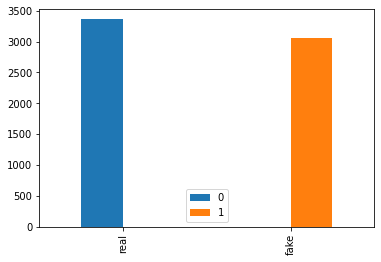

In [12]:
#let's find the lier's
def bar_chart(col): 
    real = df[df["label"]==0][col].value_counts()  
    fake = df[df["label"]==1][col].value_counts()  
    
    df1 = pd.DataFrame([real, fake]) 
    df1.index = ["real", "fake"] 
    df1.plot(kind="bar")

bar_chart("label")


In [13]:
#prosecution of boring words i.e. stopword removal
words =list( df['tweet'].values)
stopwords=['ourselves', 'hers','the','of','and','in', 'between', 'yourself', 'but', 'again','of', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']
split_words=[]
for word in words:
    lo_w=[]
    list_of_words=str(word).split()
    for w in list_of_words:
        if w not in stopwords:
            lo_w.append(w)
    split_words.append(lo_w)
allwords = []
for wordlist in split_words:
    allwords += wordlist

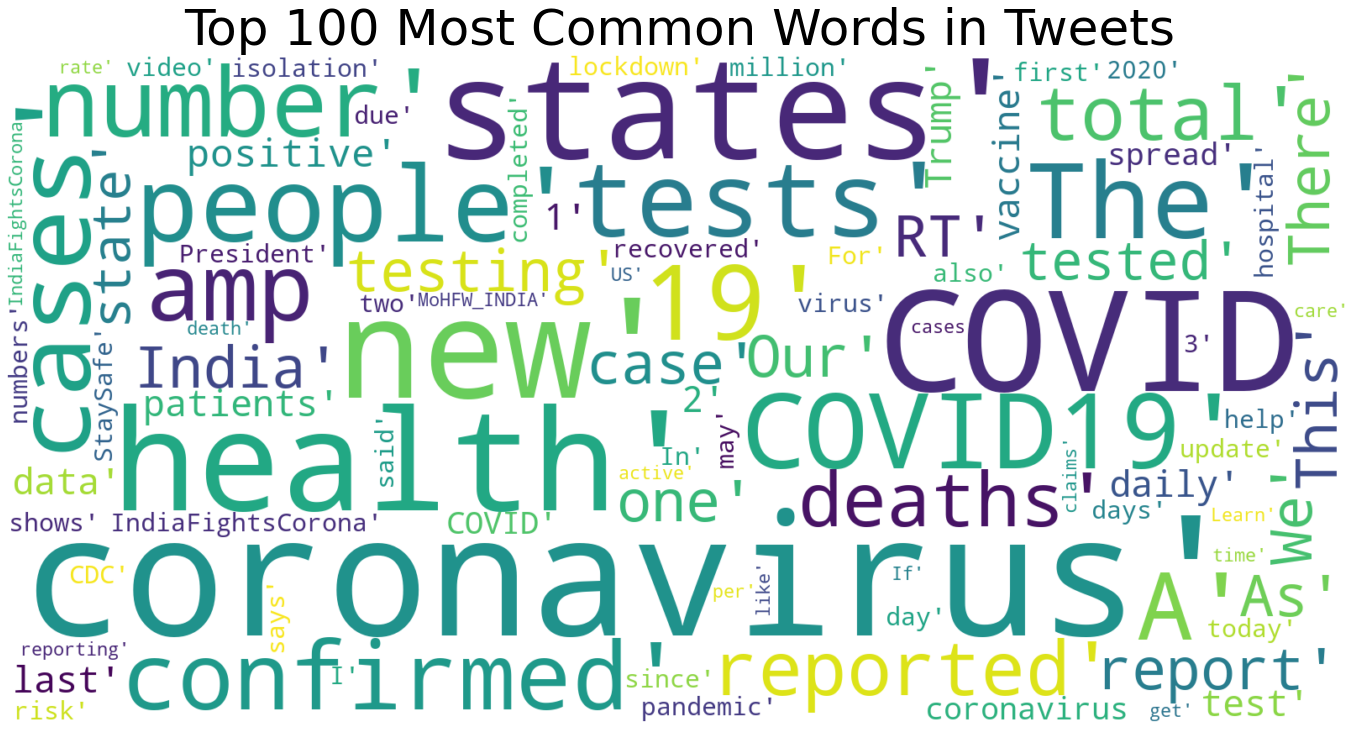

In [17]:
#frequently used words
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white', stopwords=STOPWORDS).generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words in Tweets', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

# **Model Deployment**

In [19]:
#creating what to predict with who
X = df["tweet"].values
y = df["label"] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=0)  

In [20]:
training_data = count_vector.fit_transform(X_train)  
testing_data = count_vector.transform(X_test) 

In [21]:
#logisticregression
from sklearn.linear_model import LogisticRegression  
lr = LogisticRegression() 
lr.fit(training_data, y_train) 
pred = lr.predict(testing_data) 

In [22]:
#SVM
from sklearn.svm import SVC 
from sklearn.pipeline import make_pipeline
    
svm_clf = SVC(gamma='auto') 
svm_clf.fit(training_data, y_train) 
pred1 = svm_clf.predict(testing_data)

In [24]:
#decisiontree
from sklearn.tree import DecisionTreeClassifier , export_graphviz 

dtc_clf = DecisionTreeClassifier(max_depth=6, random_state=42) 
dtc_clf.fit(training_data, y_train) 
pred2 = dtc_clf.predict(testing_data)

In [25]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(training_data, y_train)

pred3 = rnd_clf.predict(testing_data)

In [27]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(training_data, y_train) 

pred4 = ada_clf.predict(testing_data) 

In [34]:
from sklearn.metrics import accuracy_score 
acc1 = accuracy_score(pred,y_test) 
acc1

0.9345794392523364

In [31]:
acc2 = accuracy_score(pred,y_test) 
acc2

0.9345794392523364

In [30]:
acc3 = accuracy_score(pred2,y_test) 
acc3

0.8302180685358256

In [32]:
acc4 = accuracy_score(pred3,y_test) 
acc4

0.8785046728971962

In [33]:
acc5 = accuracy_score(pred4,y_test) 
acc5

0.9096573208722741